##### Aldo Daniel Villaseñor Fierro
##### A01637907

### Modelo de Machine Learning para la classificación de tumores malignos
#### Se presenta el proceso de entrenamiento de una Regresión Logística para la classificación de tumores. La base de datos fue obtenida de UCI Machine Learning Repository 
URL: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

#### Se busca realizar la correcta clasificación de tumores malignos y benignos a partir de las características de los tumores. Para cumplir con este objetivo se utiliza un Arbol de Decisión para la clasificación, mediante el uso de la librería de Scikit-Learn.

    Estructura de Árbol: Un árbol de decisión es una estructura de árbol en la que cada nodo representa una característica o atributo, cada rama representa una decisión o regla, y cada hoja representa el resultado de una clasificación o una predicción. El nodo superior se llama nodo raíz, y los nodos finales se denominan nodos hoja.

    División de Datos: Para construir un árbol de decisión, el algoritmo comienza en el nodo raíz y selecciona una característica que mejor divide los datos de entrenamiento en subconjuntos más puros (es decir, subconjuntos con una sola clase o valor de regresión). La elección de la característica se basa en criterios como la ganancia de información o la reducción de la impureza, dependiendo de la tarea de clasificación o regresión.

    Recursividad: El proceso de selección y división de características se repite recursivamente en cada nodo interno hasta que se cumple un criterio de parada. Este criterio de parada puede ser la profundidad máxima del árbol, el número mínimo de muestras en un nodo hoja, o la impureza de los nodos.

    Nodos Hoja: Cuando se alcanzan las hojas, cada hoja está asociada con una clase (en el caso de clasificación) o un valor de regresión (en el caso de regresión). Las instancias de prueba se clasifican o se predice su valor de acuerdo con la hoja a la que lleguen siguiendo las reglas del árbol.

    Interpretación: Una ventaja importante de los árboles de decisión es que son fácilmente interpretables. Puedes seguir las ramas del árbol para entender cómo se toma una decisión en función de las características de entrada.

    Manejo de Overfitting: Los árboles de decisión pueden ser propensos al sobreajuste (overfitting), lo que significa que pueden adaptarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos. Para mitigar esto, se pueden utilizar técnicas como la poda (pruning) del árbol o el uso de algoritmos de ensamble, como el Random Forest o el Gradient Boosting.

    Los árboles de decisión son una herramienta poderosa y versátil en machine learning debido a su capacidad para manejar datos numéricos y categóricos, su facilidad de interpretación y su capacidad para modelar relaciones no lineales. Sin embargo, es importante ajustar los parámetros adecuadamente y considerar estrategias para evitar el sobreajuste al utilizarlos en aplicaciones prácticas.







In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix
import graphviz

#### Exportando datos de archivo csv

In [42]:
df_main=pd.read_csv('wdbc.data',encoding = 'unicode_escape', engine ='python')
df_main

,id,lbl,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### El data set cuenta con 569 registros, tiene 32 variables (ID, diagnóstico, 30 características de entrada de valor real) 

#### Información sobre los atributos

	1. Número de identificación
	2. Diagnóstico (M = maligno, B = benigno)
	3-32.
	Se calculan diez características de valor real para cada núcleo celular:
	
	a. radio (media de las distancias del centro a los puntos del perímetro)
	b. textura (desviación estándar de los valores en escala de grises)
	c. perímetro
	d. área
	e. suavidad (variación local de las longitudes de los radios)
	f. compacidad (perímetro^2 / área - 1,0)
	g. concavidad (gravedad de las partes cóncavas del contorno)
	h. puntos cóncavos (número de porciones cóncavas del contorno)
	i. simetría 
	j. dimensión fractal ("aproximación de la línea de costa" - 1)


#### Se toman solo variables que tengan una correlación mayor a 0.5 con la variable a clasificar 

In [43]:
df_main['lbl_n']= df_main.lbl.replace({'M':1,'B':0})
m = df_main.corr()
m = m[m['lbl_n']>0.5]
df = df_main.drop(['lbl','lbl_n'],axis=1)

C:\Users\Aldo\AppData\Local\Temp\ipykernel_21808\4102902119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m = df_main.corr()


#### Se crean 3 subsets de datos para entrenamiento, validación y prueba. se utliza un 70% para entrenamiento, 15% para validación y 15% para prueba y se escalan las variables de entrada utilizando MinMaxScaler de Scikit-Learn.

In [44]:
x_train, x_test, y_train , y_test = train_test_split(df,df_main.lbl_n,test_size=0.3,random_state=42)
x_test, x_validation, y_test , y_validation = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

scaler=MinMaxScaler()
scaler.fit(df)

x_train_t=scaler.transform(x_train)
x_validation_t=scaler.transform(x_validation)
x_test_t=scaler.transform(x_test)

#### Definiendo el modelo
Se utilizará un Arbol de Desición utilizando la libreria sci-kit learn, este modelo es una propuesta variando dos parametros del modelo, posteriormente se utilizará optuna para optimizar los parametros del modelo. y se realizará la comparación de este modelo y el obtenido por optuna.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

model_tree=DecisionTreeClassifier(criterion='entropy',max_features='log2')
model_tree.fit(x_train_t,y_train)


DecisionTreeClassifier(criterion='entropy', max_features='log2')

### Selección de Hiperparametros (Optuna)

Se utilizó la librería de python Optuna para la obtención de los parámetros óptimos de una
función de sci-kit learn para entrenar un Árbol de decisión para clasificación. Optuna utiliza
cross-validation con 3 folds al momento de entrenar y evaluar el modelo, se utilizó la métrica
accuracy como métrica a optimizar por optuna. También se realizaron otras pruebas con un
set de validación adicional el cual no fue incluido en el proceso de optuna.
En Optuna se declaran todas las variaciones que se deseen hacer para cada modelo y la
librería se encarga realizar varias pruebas (“trials”) para cada configuración de los parámetros
y presenta como mejor candidato al modelo con el mejor rendimiento relativo a una métrica,
accuracy en este caso.

Además de las pruebas hechas con optuna también se guarda un subset de datos para realizar
un validación el cual no es utilizado en el proceso hecho por optuna para obtener las métricas
Accuracy, F1 score y ROC AUC. La accuracy indica la proporción de predicciones que el
modelo hizo correctamente, es la más simple de estas 3. El ROC, también conocido como
AUC, es el área bajo la curva, valores más cercanos a 1 indican un mejor rendimiento del
modelo, mientras que un valor de 0.5 (o cercano a él) puede indicar que el modelo no es
mejor que una elección aleatoria. El F1 score es una métrica que combina precisión y
sensibilidad (recall) en una sola cifra. Es especialmente útil cuando se tiene un conjunto de
datos con una distribución de clases desequilibrada. Un F1 score perfecto sería 1, mientras
que el peor valor posible es 0.

In [46]:
import optuna
import sklearn.model_selection

def objective(trial):

    # Define the hyperparameter search space
    criterion = trial.suggest_categorical("criterion", ['gini','entropy','log_loss'])  # Suggested range for 'nu'
    splitter = trial.suggest_categorical("splitter", ["best", "random"])  # Suggested range for 'kernel'
    max_features = trial.suggest_categorical("max_features", ['auto','sqrt','log2'])  # Suggested range for 'gamma'
    max_depth = trial.suggest_int("max_depth", 1, 8)  # Suggested range for 'degree'
    min_samples_split = trial.suggest_int("min_samples_split", 2.0, 31.0)  # Suggested range for 'coef0'
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1.0, 30.0)  # Suggested range for 'gamma'
    ccp_alpha = trial.suggest_float("ccp_alpha", 0.0, 7.0)  # Suggested range for 'C'
    

    classifier = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        random_state=42,
    )

    # Evaluate the classifier using cross-validation
    score = sklearn.model_selection.cross_val_score(
        classifier, x_train_t, y_train, n_jobs=-1, cv=3
    )  # Adjust the number of folds as needed

    # Calculate the mean accuracy from cross-validation
    accuracy = score.mean()

    return accuracy

def prune_callback(study, trial):
    if trial.state == optuna.trial.TrialState.RUNNING:
        if study.best_value is not None and trial.value is not None:
            if trial.value < study.best_value * 0.8:  # Prune if the trial's value is significantly worse
                raise optuna.exceptions.TrialPruned()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, callbacks=[prune_callback])

# Get the best hyperparameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")

[I 2023-09-11 08:43:42,434] A new study created in memory with name: no-name-43dbb3d7-31cf-4b1f-8243-df80e57762e1
[I 2023-09-11 08:43:45,792] Trial 0 finished with value: 0.6256360598465861 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 'sqrt', 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 27, 'ccp_alpha': 1.5581172538206811}. Best is trial 0 with value: 0.6256360598465861.
[I 2023-09-11 08:43:46,919] Trial 1 finished with value: 0.6256360598465861 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 7, 'min_samples_split': 31, 'min_samples_leaf': 9, 'ccp_alpha': 3.8590192929007134}. Best is trial 0 with value: 0.6256360598465861.
[I 2023-09-11 08:43:48,081] Trial 2 finished with value: 0.6256360598465861 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 'log2', 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 17, 'ccp_alpha': 3.766925475210591}. Best is tria

Best Hyperparameters:
{'criterion': 'gini', 'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4, 'ccp_alpha': 0.009153874055746369}
Best Accuracy: 0.9297


In [47]:
model_t=DecisionTreeClassifier(**best_params)
model_t.fit(x_train_t,y_train)

DecisionTreeClassifier(ccp_alpha=0.009153874055746369, max_depth=5,
                       max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=4)

#### Se obtienen los mejores parámetros optimizados para el modelo de Arbol de Decisión

In [48]:
best_params

{'criterion': 'gini',
 'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 5,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'ccp_alpha': 0.009153874055746369}

#### Métricas del modelo para el set de training

In [49]:
# Modelo propuesto inicial (sin optimizar)
y_hat_t=model_tree.predict(x_train_t)

y_hat_train=y_hat_t

model_t_acc=accuracy_score(y_train,y_hat_t)
model_t_f1=f1_score(y_train,y_hat_t)
model_t_auc=roc_auc_score(y_train,y_hat_t)

print(model_t_acc)
print(model_t_f1)
print(model_t_auc)
confusion_matrix(y_train,y_hat_t)

1.0
1.0
1.0


array([[249,   0],
       [  0, 149]], dtype=int64)

In [50]:
#Modelo optimizado con optuna
y_hat_t=model_t.predict(x_train_t)#modelo optimizado con optuna

y_hat_train=y_hat_t

model_t_acc=accuracy_score(y_train,y_hat_t)
model_t_f1=f1_score(y_train,y_hat_t)
model_t_auc=roc_auc_score(y_train,y_hat_t)

print(model_t_acc)
print(model_t_f1)
print(model_t_auc)
confusion_matrix(y_train,y_hat_t)

0.9472361809045227
0.9283276450511946
0.9403115818980621


array([[241,   8],
       [ 13, 136]], dtype=int64)

#### Métricas del modelo para el set de Validation

In [51]:
# Modelo propuesto inicial (sin optimizar)
y_hat_t=model_tree.predict(x_validation_t)

model_t_acc=accuracy_score(y_validation,y_hat_t)
model_t_f1=f1_score(y_validation,y_hat_t)
model_t_auc=roc_auc_score(y_validation,y_hat_t)

print(model_t_acc)
print(model_t_f1)
print(model_t_auc)
confusion_matrix(y_validation,y_hat_t)

0.9418604651162791
0.9122807017543859
0.9583333333333333


array([[55,  5],
       [ 0, 26]], dtype=int64)

In [52]:
#Modelo optimizado con optuna
y_hat_t=model_t.predict(x_validation_t)

model_t_acc=accuracy_score(y_validation,y_hat_t)
model_t_f1=f1_score(y_validation,y_hat_t)
model_t_auc=roc_auc_score(y_validation,y_hat_t)

print('Accuracy: ',model_t_acc)
print('roc auc:',model_t_auc)
print('F1 score:',model_t_f1)
confusion_matrix(y_validation,y_hat_t)

Accuracy:  0.9767441860465116
roc auc: 0.9724358974358974
F1 score: 0.9615384615384616


array([[59,  1],
       [ 1, 25]], dtype=int64)

#### Tras realizar pruebas para optimizar los parametros del modelo mediante la libreria optuna la mejor configuración para el modelo de arbol de decisión fue la encontrada por optuna el cual obtuvo las mejores metricas en todas las pruebas.

#### plot bar con las feature importances de cada variable utilizada por el modelo

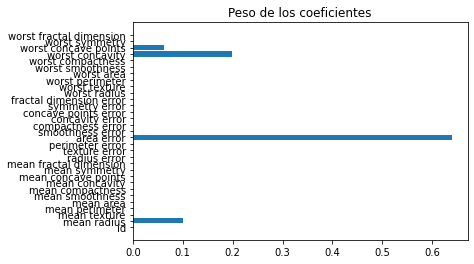

In [67]:
plt.barh(list(df.columns),list(model_t.feature_importances_))
plt.title("Peso de los coeficientes")
plt.show()

#### Data Frame con las variables utilizadas y una columna para comparar predicciones hechas por el modelo y el valor real del set de datos

In [54]:
y_hat=model_tree.predict(x_test)
df_pruebas=pd.DataFrame()
df_pruebas['prediction'] = np.concatenate((y_hat,y_hat_train))
df_pruebas['real'] = np.concatenate((y_test,y_train))
df_pruebas[df.columns] = pd.concat([x_test,x_train],ignore_index=True)
df_pruebas

c:\Users\Aldo\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,prediction,real,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,1,8911163,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,...,20.920,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948
1,0,0,861648,14.620,24.02,94.57,662.7,0.08974,0.08606,0.03102,...,16.110,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246
2,0,1,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
3,1,1,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
4,1,1,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,0,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
479,0,0,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
480,0,0,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
481,1,1,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [55]:
df_pruebas.iloc[np.random.randint(len(x_test), size=(3))]


,prediction,real,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
10,1,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.1974,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
64,1,1,854002,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,...,24.15,30.90,161.4,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230
78,1,0,884626,12.89,14.11,84.95,512.2,0.08760,0.1346,0.1374,...,14.39,17.70,105.0,639.1,0.1254,0.5849,0.7727,0.1561,0.2639,0.11780


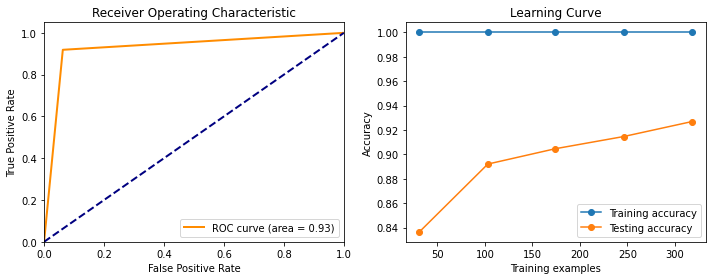

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.9294117647058824
Área bajo la curva ROC: 0.9282094594594594
Sesgo (bias) alto
Varianza baja
Sobreajuste (overfitting)


In [66]:
# Evaluar el modelo en el conjunto de entrenamiento y prueba
y_train_pred = model_tree.predict(x_train_t)
y_test_pred = model_tree.predict(x_test_t)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular las curvas ROC para evaluar la varianza
y_score = model_tree.predict_proba(x_test_t)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Calcular las curvas ROC para evaluar la varianza
y_score = model_tree.predict_proba(x_test_t)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calcular la curva de aprendizaje para evaluar el sesgo
train_sizes, train_scores, test_scores = learning_curve(model_tree, x_train_t, y_train, cv=5, scoring='accuracy')

# Plotea la curva ROC
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Plotea la curva de aprendizaje
plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
print(f'Área bajo la curva ROC: {roc_auc}')

# Analiza el sesgo, la varianza y el nivel de ajuste
if train_accuracy > test_accuracy:
    print('Sesgo (bias) alto')
else:
    print('Sesgo (bias) bajo')

if roc_auc < 0.5:
    print('Varianza alta')
else:
    print('Varianza baja')

if train_accuracy == test_accuracy:
    print('Ajuste perfecto')
elif train_accuracy > test_accuracy:
    print('Sobreajuste (overfitting)')
else:
    print('Subajuste (underfitting)')

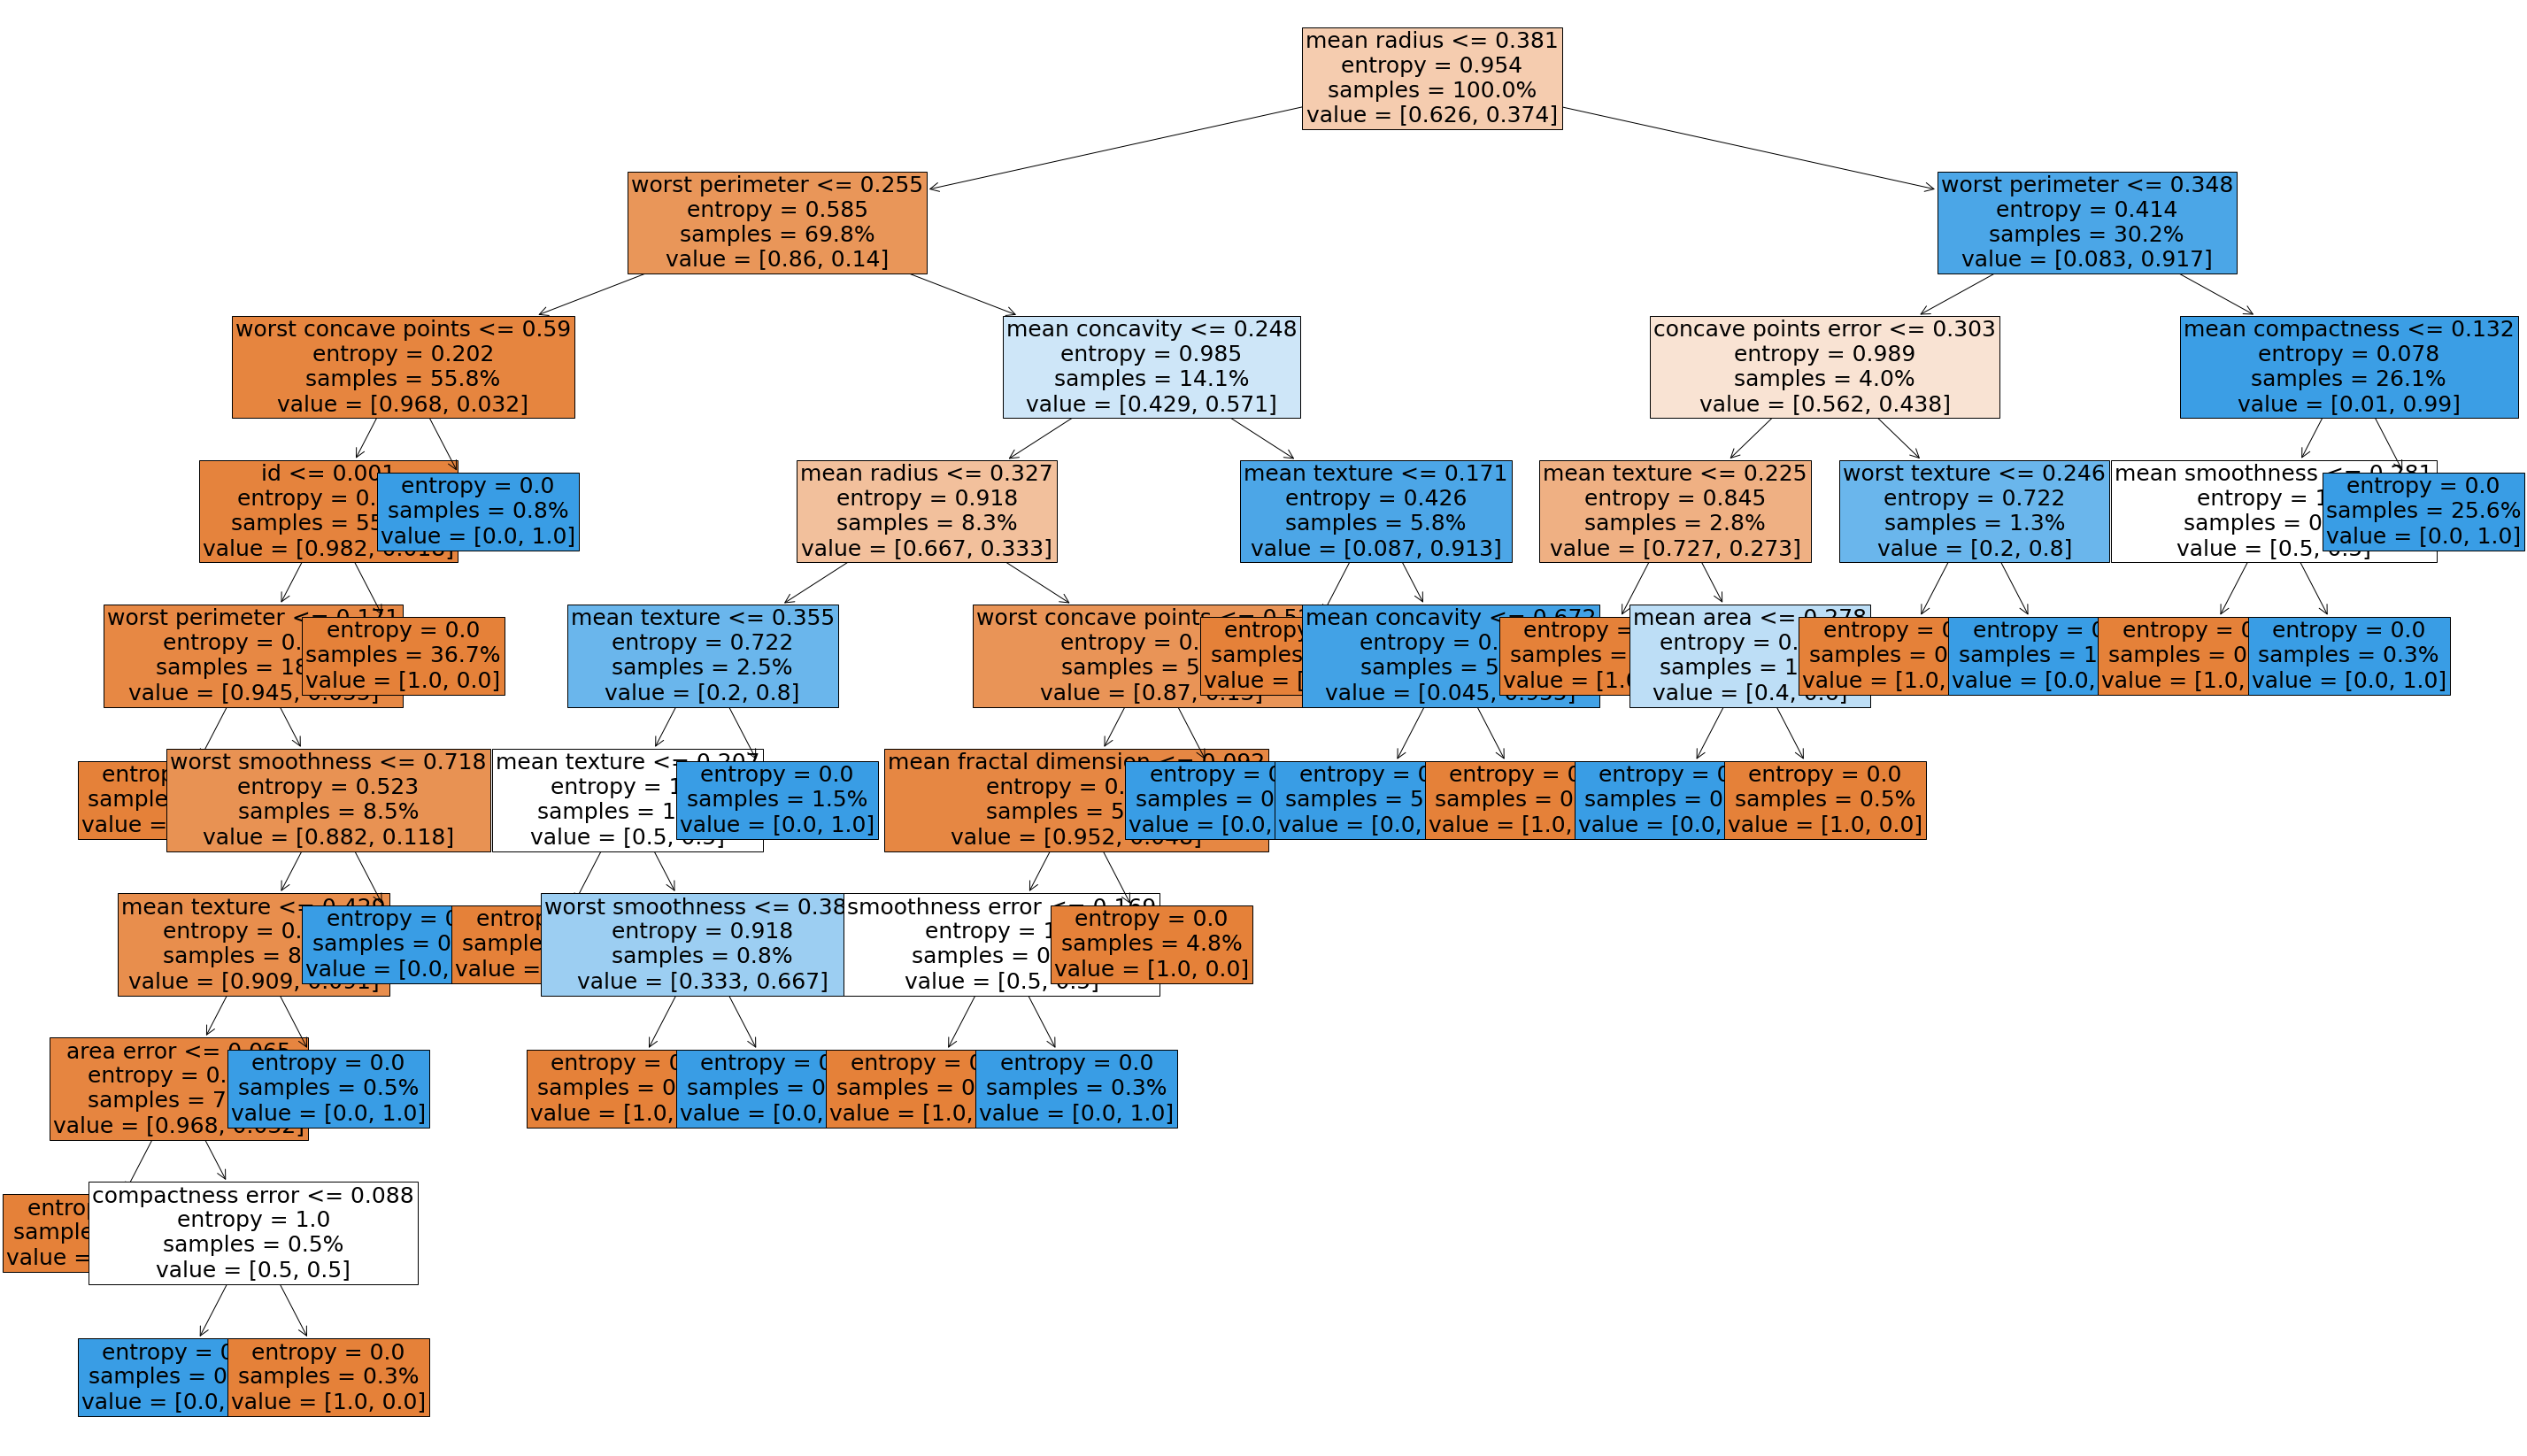

In [63]:
plt.figure(figsize=(50,30))
tree.plot_tree(model_tree,feature_names=df_pruebas.columns[2:],fontsize=25,filled=True,proportion=True)
plt.show()